In [14]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle
import matplotlib.colors as colors

from sklearn.cluster import KMeans, Birch, DBSCAN

In [193]:
def plotClustering(models, data, titles, centers=False):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, model in enumerate(models):
        d = data[i]
        axes[i].set_title(titles[i])
        
        plt_colors = cycle(colors.TABLEAU_COLORS)

        plt_K = np.unique(model.labels_).size

        for k in range(plt_K):
            color = next(plt_colors)
            mask = model.labels_ == k
            axes[i].scatter(x=d[mask, 0], y=d[mask, 1], c=color, s=20)
        
        if centers:
            plt_colors = cycle(colors.TABLEAU_COLORS)
            for c in model.cluster_centers_:
                color = next(plt_colors)
                axes[i].scatter(x=c[0], y=c[1], c=color, edgecolor='w', s=200)

    plt.show()

## Zadanie 2.
Normalizacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości z przedziału [0, 1] dokonywane za pomocą przekształcenia x’ = (x – xmin) / (xmax – xmin), gdzie x’ to przeskalowana wartość, x to wartość oryginalna, zaś xmin i xmax to odpowiednio minimalna i maksymalna zarejestrowana wartość cechy (normalizacji dokonuje się dla każdej cechy osobno).

Standaryzacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości o rozkładzie N(0, 1) dokonywane za pomocą przekształcenia x’ = (x – m) / s, gdzie x’ to przeskalowana wartość, x to wartość oryginalna, zaś m i s to odpowiednio średnia i odchylenie standardowe zarejestrowanych wartości cechy (standaryzacji dokonuje się dla każdej cechy osobno).

Czy normalizacja lub standaryzacja danych może mieć wpływ na działanie algorytmu K-Means? Jeśli tak, to skonstruuj proste przykłady pokazujące, że dane znormalizowane lub ustandaryzowane są lepiej grupowane niż dane oryginalne. Zrób stosowne rysunki. A jak jest w przypadku algorytmów BIRCH i DBScan?

In [205]:
N, d = 10000, 2
X1 = np.random.rand(N, d) * np.array([1, 100])
X2 = np.random.rand(N, d) * np.array([1, 100]) + np.array([2, 0])

X = np.concatenate((X1, X2))[:, 0]
Y = np.concatenate((X1, X2))[:, 1]

X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

X_std = (X - np.mean(X)) / np.std(X)
Y_std = (Y - np.mean(Y)) / np.std(Y)

XY = [np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]
titles = ['X', 'normalized X', 'standardized X']

### KMeans

In [206]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.c_[X, Y])

kmeans_norm = KMeans(n_clusters=2)
kmeans_norm.fit(np.c_[X_norm, Y_norm])

kmeans_std = KMeans(n_clusters=2)
kmeans_std.fit(np.c_[X_std, Y_std])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

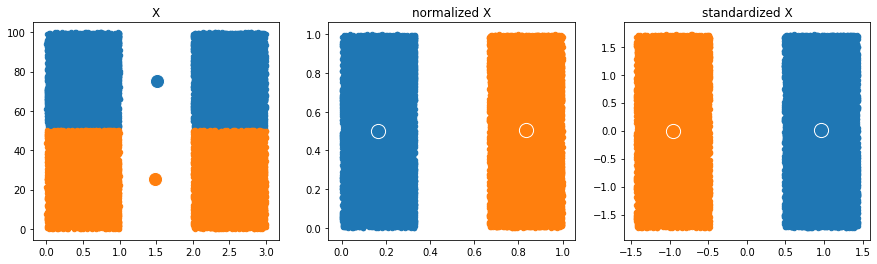

In [207]:
plotClustering([kmeans, kmeans_norm, kmeans_std], 
               XY, titles, centers=True)

### Birch

In [208]:
birch = Birch(n_clusters=2, threshold=0.3)
birch.fit(np.c_[X, Y])

birch_norm = Birch(n_clusters=2, threshold=0.3)
birch_norm.fit(np.c_[X_norm, Y_norm])

birch_std = Birch(n_clusters=2, threshold=0.3)
birch_std.fit(np.c_[X_std, Y_std])

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
      threshold=0.3)

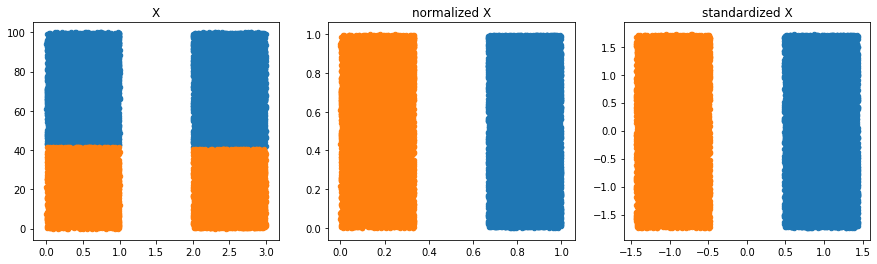

In [209]:
plotClustering([birch, birch_norm, birch_std], XY, titles)

### DBScan

In [218]:
N, d = 1000, 2
X1 = np.random.rand(N, d) * np.array([1, 100])
X2 = np.random.rand(N, d) * np.array([1, 100]) + np.array([2, 0])

X = np.concatenate((X1, X2))[:, 0]
Y = np.concatenate((X1, X2))[:, 1]

X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

X_std = (X - np.mean(X)) / np.std(X)
Y_std = (Y - np.mean(Y)) / np.std(Y)

XY = [np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]
titles = ['X', 'normalized X', 'standardized X']

In [225]:
dbs = DBSCAN(eps=1)
dbs.fit(np.c_[X, Y])

dbs_norm = DBSCAN(eps=0.2)
dbs_norm.fit(np.c_[X_norm, Y_norm])

dbs_std = DBSCAN(eps=0.2)
dbs_std.fit(np.c_[X_std, Y_std])

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

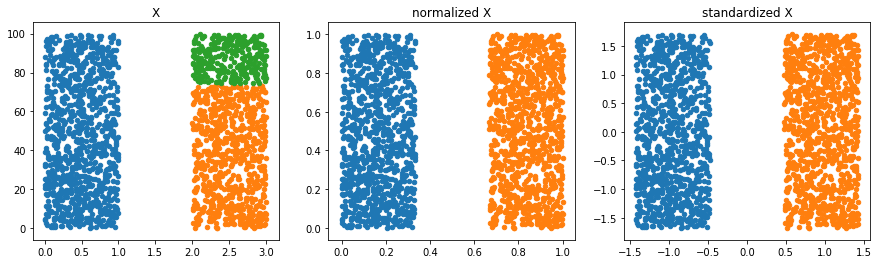

In [226]:
plotClustering([dbs, dbs_norm, dbs_std], XY, titles)